In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Read the data file into the Pandas dataframe

In [43]:
train_df = pd.read_csv("titanic/train.csv")

- see how the data looks like

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

The Survived column is the target variable. If Suvival = 1 then the passenger survived, otherwise he's didn't. 

The other variables are the data about the passengers. They are the features.

- PassengerId: the id of each traveler on the Titanic
- Pclass: the class of the passenger. It has three possible values: 1,2,3 (first, second and third class)
- Name: The Name of the passenger
- Sex: The gender of the passenger
- Age: Age of the passenger
- SibSp: number of siblings and spouses traveling with the passenger
- Parch: number of parents and children traveling with the passenger
- Ticket: The ticket number
- Fare: The cost of the ticket
- Cabin: The cabin number
- Embarked: The embarkation. This describe three possible areas of the Titanic from which the people embark. Three possible values S,C,Q

## Visualizations

count of the survived vs not survived

Codes :
- 0 : Died 
- 1 : Survived

In [47]:
fig = plt.figure(figsize=(21,7))

<Figure size 1512x504 with 0 Axes>

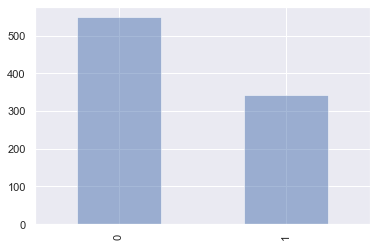

In [48]:
train_df.Survived.value_counts().plot(kind='bar', alpha=0.5)

Instead of the numbers, lets use percentages

we can see that :
- 40% of the people survived 
- 60% of the people died

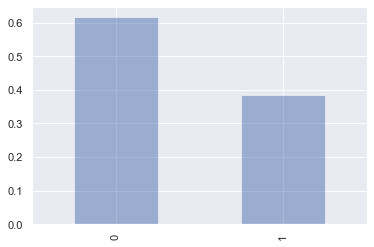

In [49]:
train_df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

#### Relation between Age and the survival chances

We can observe following :
- few older people died (age > 60) more
- few younger people survived (age < 10) more
- apart from these mostly the data is similar, i.e. lot of people between 20 and 45

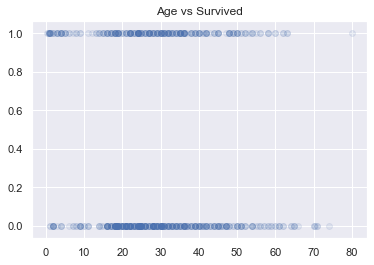

In [50]:
plt.title("Age vs Survived")
plt.scatter(train_df.Age, train_df.Survived, alpha=0.1)

#### Relation between Age and the survival chances

We can observe following :
- uneven distribution of survived passengers among the classes
- 55% were in the poorest class , i.e. 3rd class
- 25% were in 1st class
- 20% were in 2nd class

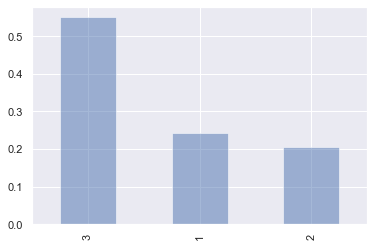

In [51]:
train_df.Pclass.value_counts(normalize=True).plot(kind='bar', alpha=0.5)

#### Relation between Age and Class

We can observe:
- 3rd class the average age is near 20's, i.e. younger
- 1st class the average age is near 40's, i.e. older

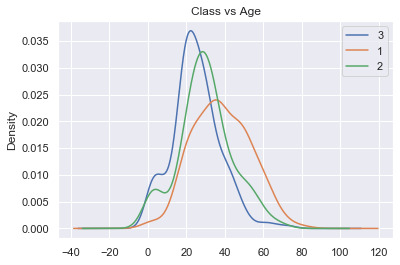

In [52]:
for x in df.Pclass.unique():
    train_df.Age[train_df.Pclass == x].plot(kind='kde')
    
plt.title('Class vs Age')
#plt.legend(("1",'2','3'))
plt.legend(train_df.Pclass.unique())

### Based on Gender 

We can observe :
- 80% of male died and nearly 20% survived
- more than 70% females survived and nearly 25% died
- nearly 65% of the females survived but only 35% male survived

In [53]:
female_col = '#FA0000'
male_col = 'blue'

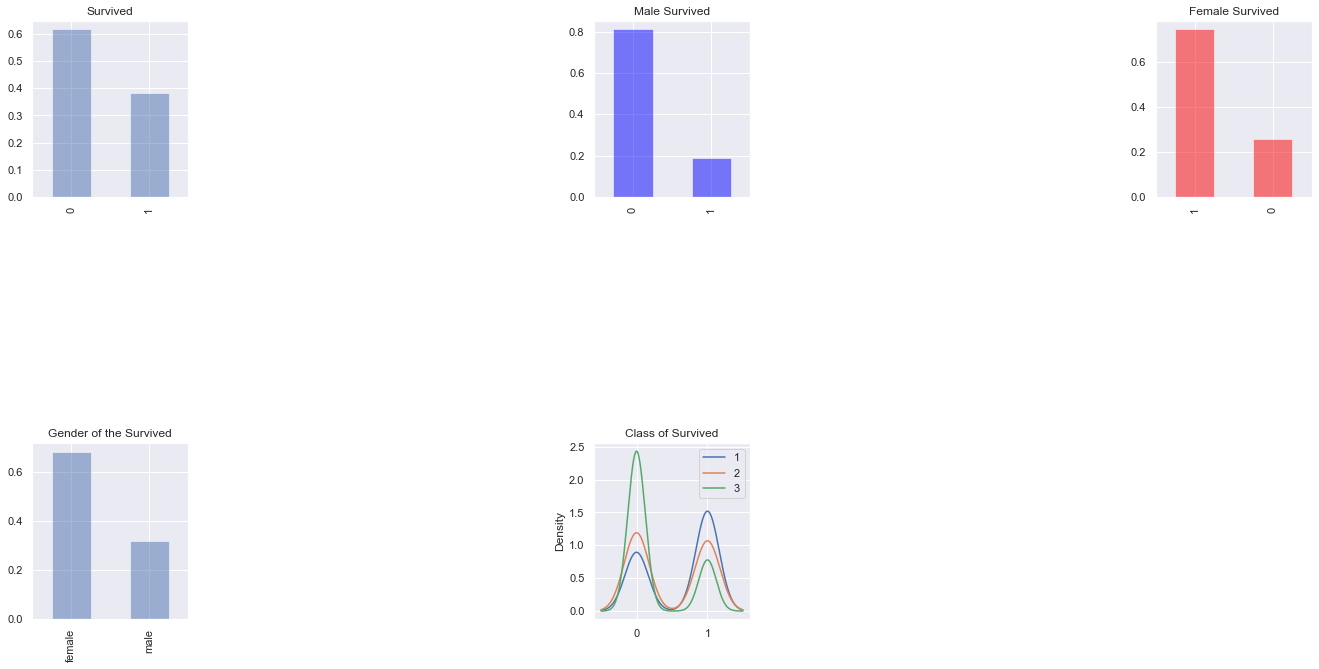

In [54]:
fig = plt.figure(figsize=(33,11))

plt.subplot2grid((3,10),(0,0))
train_df.Survived.value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title("Survived")

plt.subplot2grid((3,10),(0,3))
train_df.Survived[df.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha = 0.5, color = male_col)
plt.title("Male Survived")

plt.subplot2grid((3,10),(0,6))
train_df.Survived[df.Sex == 'female'].value_counts(normalize=True).plot(kind='bar',alpha = 0.5, color = female_col)
plt.title("Female Survived")

plt.subplot2grid((3,10),(2,0))
train_df.Sex[df.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha = 0.5)
plt.title("Gender of the Survived")

plt.subplot2grid((3,10),(2,3))
for x in [1,2,3]:
    train_df.Survived[train_df.Pclass == x].plot(kind='kde')
plt.title('Class of Survived')
plt.legend(("1",'2','3'))

plt.show()

Based on the Class :
- The 3rd class passengers were the most amongst died
- The 1st class passengers were amongst the most survived

### Relation between Age & Gender together with the Survival

Text(0.5, 1.0, 'Poor Survived - Female ')

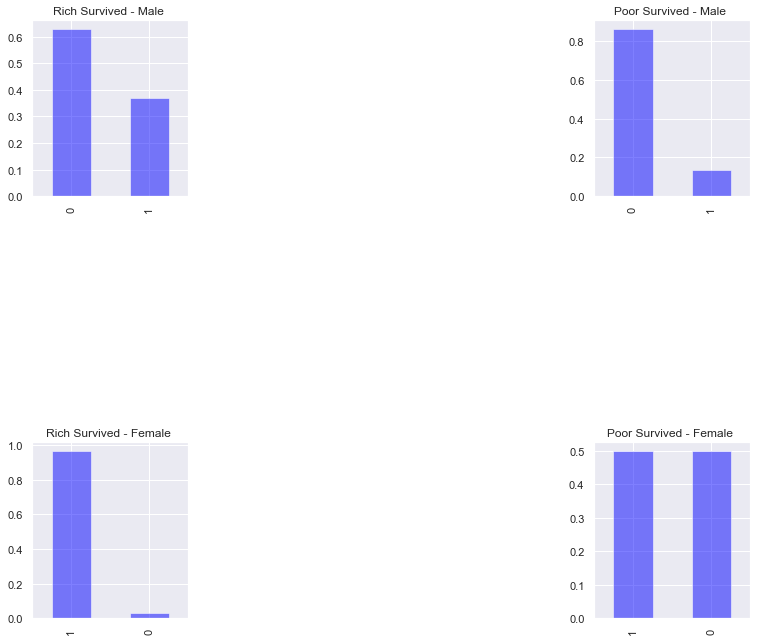

In [55]:
fig = plt.figure(figsize=(33,11))

plt.subplot2grid((3,10),(0,0))
train_df.Survived[(train_df.Sex == 'male') & (train_df.Pclass == 1)].value_counts(normalize=True).plot(
    kind='bar', alpha = 0.5, color = male_col)
plt.title("Rich Survived - Male ")

plt.subplot2grid((3,10),(0,3))
train_df.Survived[(train_df.Sex == 'male') & (train_df.Pclass == 3)].value_counts(normalize=True).plot(
    kind='bar', alpha = 0.5, color = male_col)
plt.title("Poor Survived - Male ")


plt.subplot2grid((3,10),(2,0))
train_df.Survived[(train_df.Sex == 'female') & (train_df.Pclass == 1)].value_counts(normalize=True).plot(
    kind='bar', alpha = 0.5, color = male_col)
plt.title("Rich Survived - Female ")

plt.subplot2grid((3,10),(2,3))
train_df.Survived[(train_df.Sex == 'female') & (train_df.Pclass == 3)].value_counts(normalize=True).plot(
    kind='bar', alpha = 0.5, color = male_col)
plt.title("Poor Survived - Female ")

We can observe :
- 35% of rich males survived compared to 10% poor males
- more than 95% Rich females survived while Poor females had 50:50 chance 


### Bar chart visuals for the categorical features

- Pclass
- sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [56]:
%matplotlib inline
sns.set()
def bar_chart_visual(cat_feature):
    survived = train_df[train_df['Survived']==1][cat_feature].value_counts()
    dead = train_df[train_df['Survived']==0][cat_feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,8))

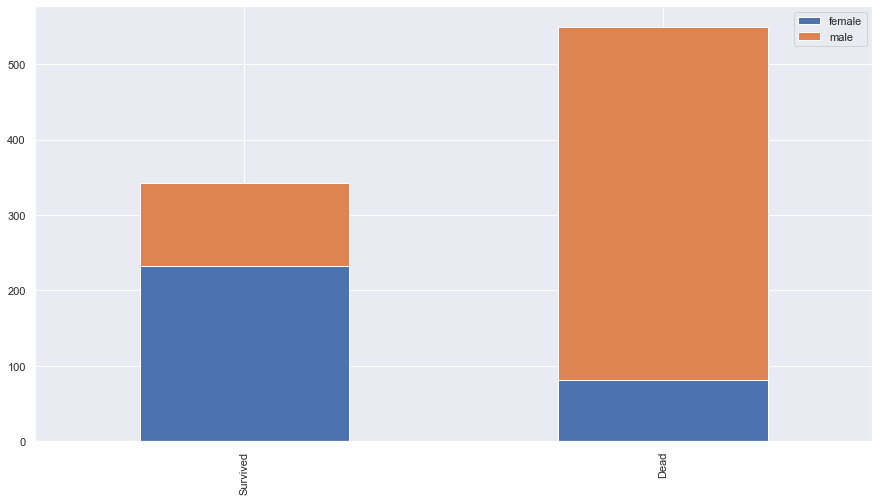

In [57]:
bar_chart_visual('Sex')

- The Chart is inline to our observation that Women more likely survivied than Men

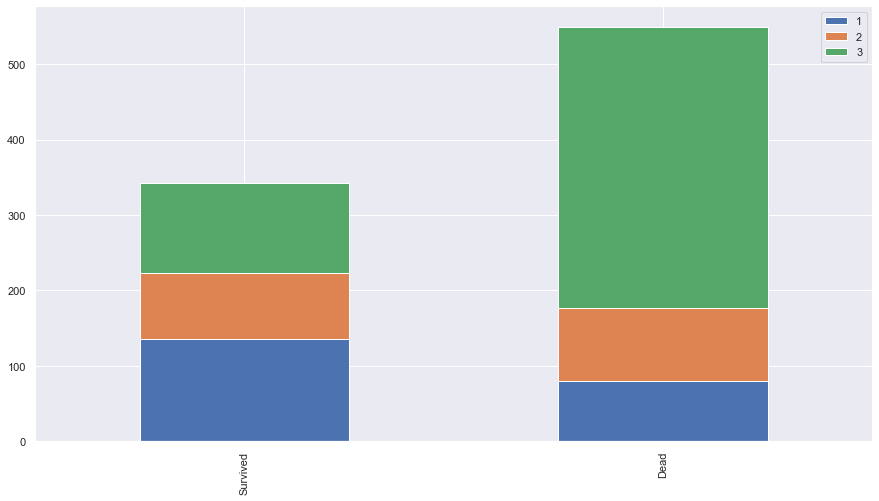

In [59]:
bar_chart_visual('Pclass')

In [60]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [62]:
train_df[train_df.Survived == 1].Pclass.value_counts(normalize=True)*100

1    39.766082
3    34.795322
2    25.438596
Name: Pclass, dtype: float64

In [63]:
train_df[train_df.Survived == 0].Pclass.value_counts(normalize=True)*100

3    67.759563
2    17.668488
1    14.571949
Name: Pclass, dtype: float64

 The above visual and table confirms that :

- 40% of the people that Survived were from 1st Class
- 68% of the people that Died were from the 3rd Class

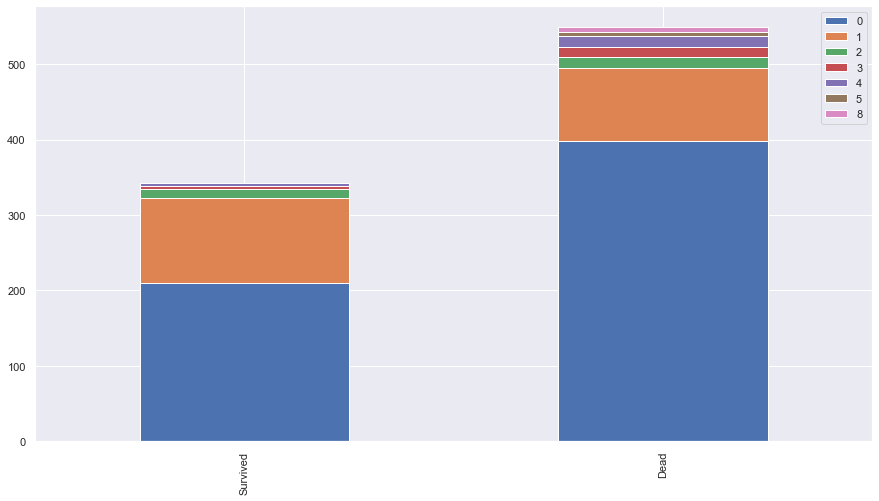

In [64]:
bar_chart_visual('SibSp')

In [66]:
train_df[train_df.Survived == 1].SibSp.value_counts(normalize=True)*100

0    61.403509
1    32.748538
2     3.801170
3     1.169591
4     0.877193
Name: SibSp, dtype: float64

In [67]:
train_df[train_df.Survived == 0].SibSp.value_counts(normalize=True)*100

0    72.495446
1    17.668488
4     2.732240
2     2.732240
3     2.185792
8     1.275046
5     0.910747
Name: SibSp, dtype: float64

- Here it seems like most of the people were travelling with No or only 1 siblings

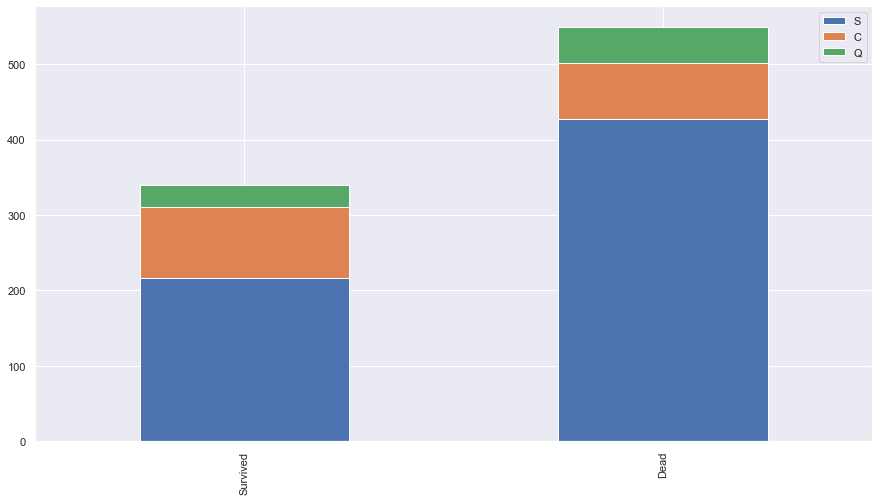

In [68]:
bar_chart_visual('Embarked')

In [71]:
train_df.Embarked.value_counts(normalize=True)*100

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

In [72]:
train_df[train_df.Survived == 1].Embarked.value_counts(normalize=True)*100

S    63.823529
C    27.352941
Q     8.823529
Name: Embarked, dtype: float64

In [73]:
train_df[train_df.Survived == 0].Embarked.value_counts(normalize=True)*100

S    77.777778
C    13.661202
Q     8.561020
Name: Embarked, dtype: float64

- The Chart confirms that if a person aboarded from C slightly more likely survived